# Regressions Excercise

In [1]:
library(car)
library(e1071)
library(mechkar)

Loading required package: carData



## Linear Regression

In [98]:
tips <- read.csv("../data/tips.csv")
head(tips)

total_bill,tip,sex,smoker,day,time,size
<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.50,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4


In [97]:
#summary(bd)
summary(tips)

   total_bill         tip             sex      smoker      day         time    
 Min.   : 3.07   Min.   : 1.000   Female: 87   No :151   Fri :19   Dinner:176  
 1st Qu.:13.35   1st Qu.: 2.000   Male  :157   Yes: 93   Sat :87   Lunch : 68  
 Median :17.80   Median : 2.900                          Sun :76               
 Mean   :19.79   Mean   : 2.998                          Thur:62               
 3rd Qu.:24.13   3rd Qu.: 3.562                                                
 Max.   :50.81   Max.   :10.000                                                
      size     
 Min.   :1.00  
 1st Qu.:2.00  
 Median :2.00  
 Mean   :2.57  
 3rd Qu.:3.00  
 Max.   :6.00  

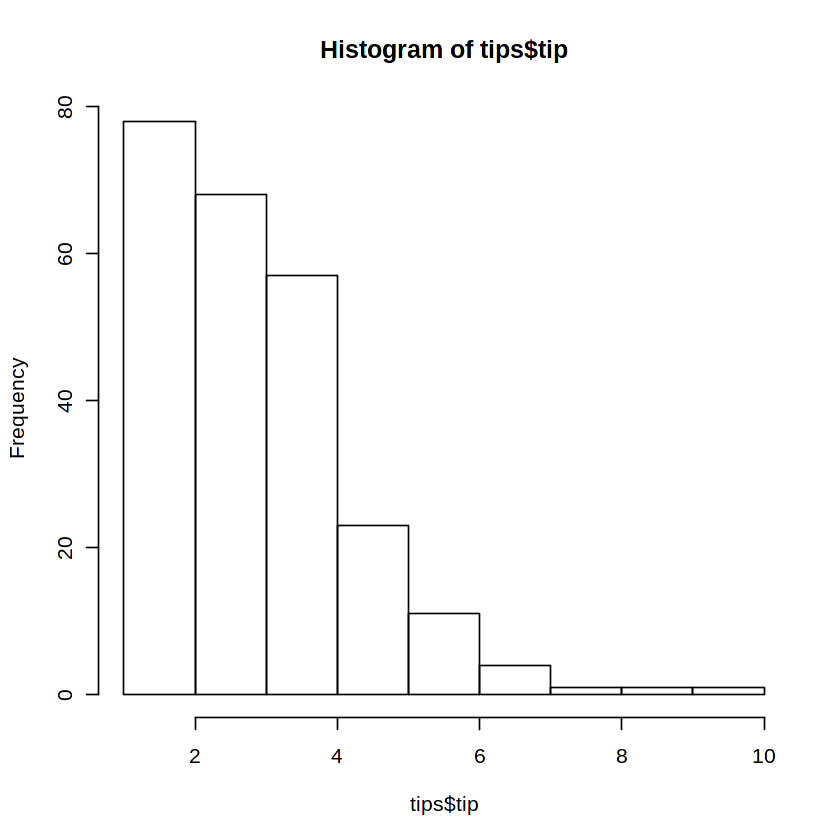

In [8]:
hist(tips$tip)

In [89]:
mod1 <- lm(tip ~ ., data=tips)
summary(mod1)


Call:
lm(formula = tip ~ ., data = tips)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8475 -0.5729 -0.1026  0.4756  4.1076 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.803817   0.352702   2.279   0.0236 *  
total_bill   0.094487   0.009601   9.841   <2e-16 ***
sexMale     -0.032441   0.141612  -0.229   0.8190    
smokerYes   -0.086408   0.146587  -0.589   0.5561    
daySat      -0.121458   0.309742  -0.392   0.6953    
daySun      -0.025481   0.321298  -0.079   0.9369    
dayThur     -0.162259   0.393405  -0.412   0.6804    
timeLunch    0.068129   0.444617   0.153   0.8783    
size         0.175992   0.089528   1.966   0.0505 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.024 on 235 degrees of freedom
Multiple R-squared:  0.4701,	Adjusted R-squared:  0.452 
F-statistic: 26.06 on 8 and 235 DF,  p-value: < 2.2e-16


In [90]:
vif(mod1)



,GVIF,Df,GVIF^(1/(2*Df))
total_bill,1.692370,1,1.300911
sex,1.070126,1,1.034469
smoker,1.178870,1,1.085758
day,10.645592,3,1.483184
time,9.242900,1,3.040214
size,1.679494,1,1.295953


In [84]:
Table2(mod1)
?Table2

,Estimate,CI_lo,CI_hi,p.value
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),18.508,4.562,32.454,0.014
timeLunch,0.608,-0.099,1.314,0.277
daySat,1.078,0.208,1.948,0.861
daySun,1.401,0.259,2.542,0.491
dayThur,1.409,-0.010,2.829,0.572


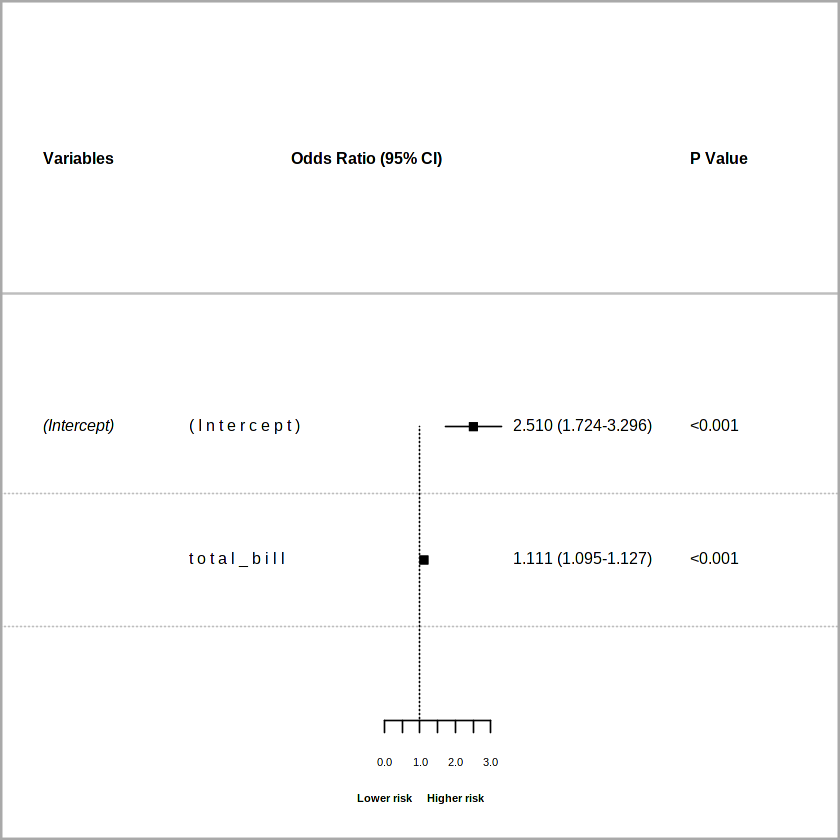

In [73]:
Table2.forestplot(mod1)

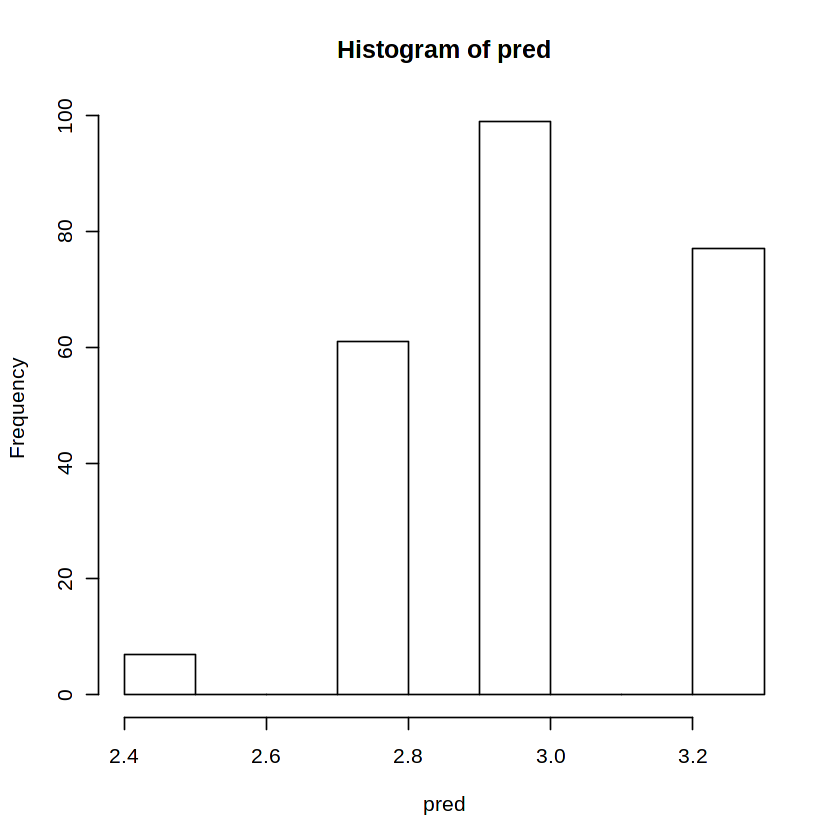

In [85]:
pred <- predict(mod1, newdata = tips)
hist(pred)

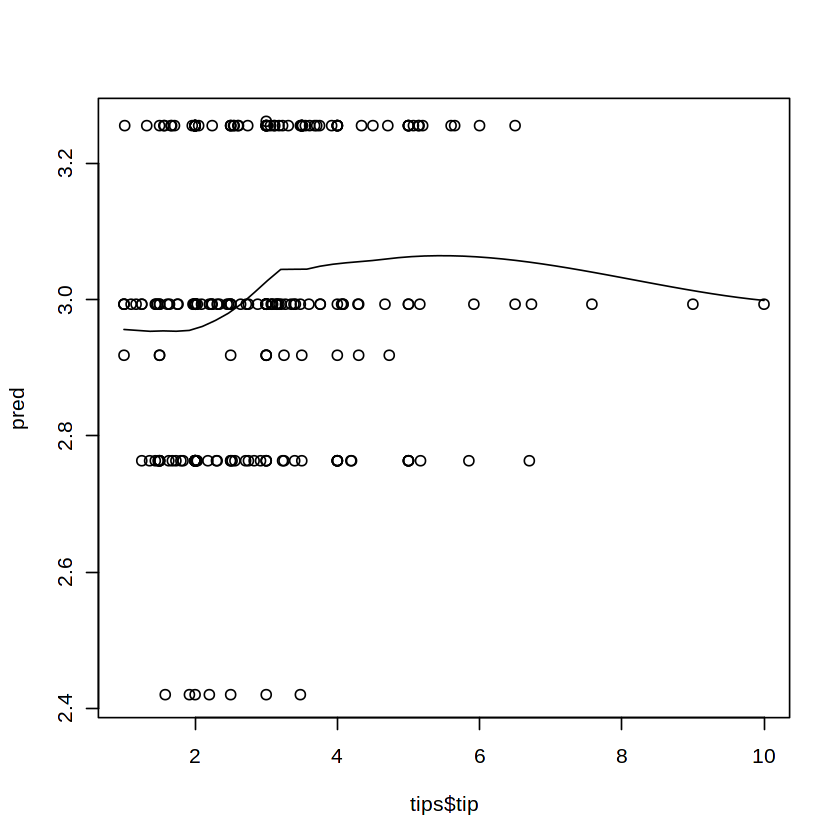

In [86]:
scatter.smooth(x = tips$tip, y=pred)


## Logistic Regression

In [91]:
bd <- read.csv("../data/blood_donations.csv")
head(bd)

time_since_last,donate_times,blood_total_cc,time_since_first,donate_2007
<int>,<int>,<int>,<int>,<int>
2,50,12500,98,1
0,13,3250,28,1
1,16,4000,35,1
2,20,5000,45,1
1,24,6000,77,0
4,4,1000,4,0


In [102]:
bd$log_cc <- log(bd$blood_total_cc)
summary(bd)

 time_since_last   donate_times    blood_total_cc  time_since_first
 Min.   : 0.000   Min.   : 1.000   Min.   :  250   Min.   : 2.00   
 1st Qu.: 2.750   1st Qu.: 2.000   1st Qu.:  500   1st Qu.:16.00   
 Median : 7.000   Median : 4.000   Median : 1000   Median :28.00   
 Mean   : 9.507   Mean   : 5.515   Mean   : 1379   Mean   :34.28   
 3rd Qu.:14.000   3rd Qu.: 7.000   3rd Qu.: 1750   3rd Qu.:50.00   
 Max.   :74.000   Max.   :50.000   Max.   :12500   Max.   :98.00   
  donate_2007        log_cc     
 Min.   :0.000   Min.   :5.521  
 1st Qu.:0.000   1st Qu.:6.215  
 Median :0.000   Median :6.908  
 Mean   :0.238   Mean   :6.813  
 3rd Qu.:0.000   3rd Qu.:7.467  
 Max.   :1.000   Max.   :9.433  

In [93]:
table(bd$donate_2007)


  0   1 
570 178 

In [103]:
#mod2 <- glm(donate_2007 ~ time_since_last + donate_times + time_since_first, data=bd)

mod2 <- glm(donate_2007 ~ ., data=bd, family="binomial")
summary(mod2)


Call:
glm(formula = donate_2007 ~ ., family = "binomial", data = bd)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6227  -0.7439  -0.4678  -0.1413   2.7341  

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -6.11045    1.35711  -4.503 6.71e-06 ***
time_since_last  -0.08773    0.01789  -4.903 9.43e-07 ***
donate_times      0.04529    0.02899   1.562    0.118    
blood_total_cc         NA         NA      NA       NA    
time_since_first -0.03489    0.00678  -5.145 2.67e-07 ***
log_cc            0.93668    0.22032   4.251 2.12e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 820.89  on 747  degrees of freedom
Residual deviance: 689.88  on 743  degrees of freedom
AIC: 699.88

Number of Fisher Scoring iterations: 5


 #### Why blood_total_cc gives NA? Try to find the cause... 
 #### How can you correct this?
 

In [108]:
Table2(mod2)

,Estimate,CI_lo,CI_hi,p.value
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.002,-0.004,0.008,0.000
time_since_last,0.916,0.884,0.948,0.000
donate_times,1.046,0.987,1.106,0.129
time_since_first,0.966,0.953,0.979,0.000
log_cc,2.551,1.450,3.653,0.006


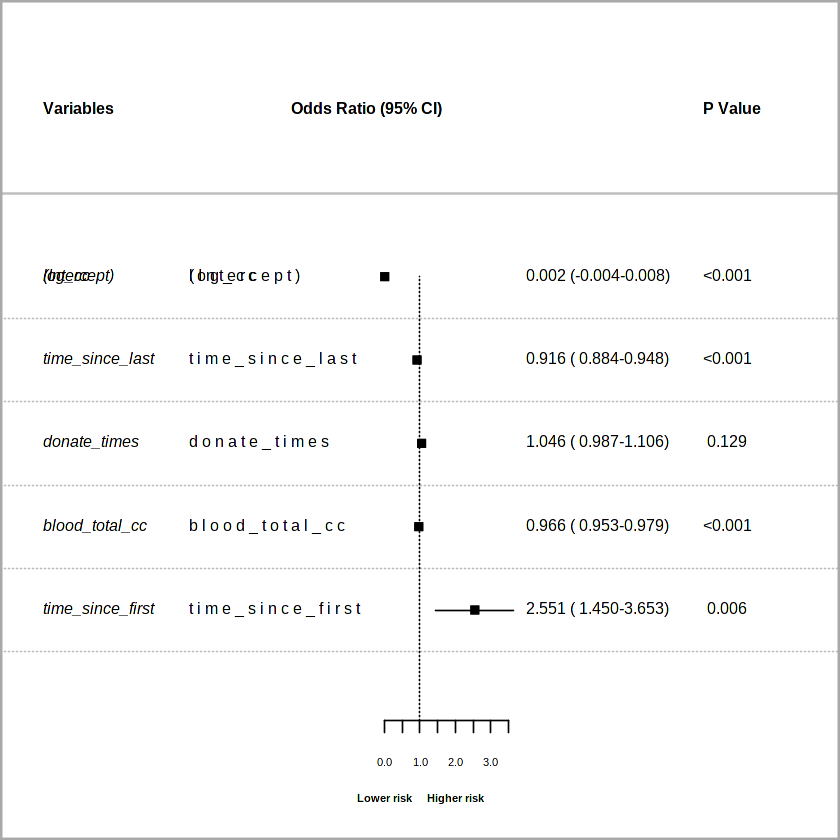

In [107]:
Table2.forestplot(mod2)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


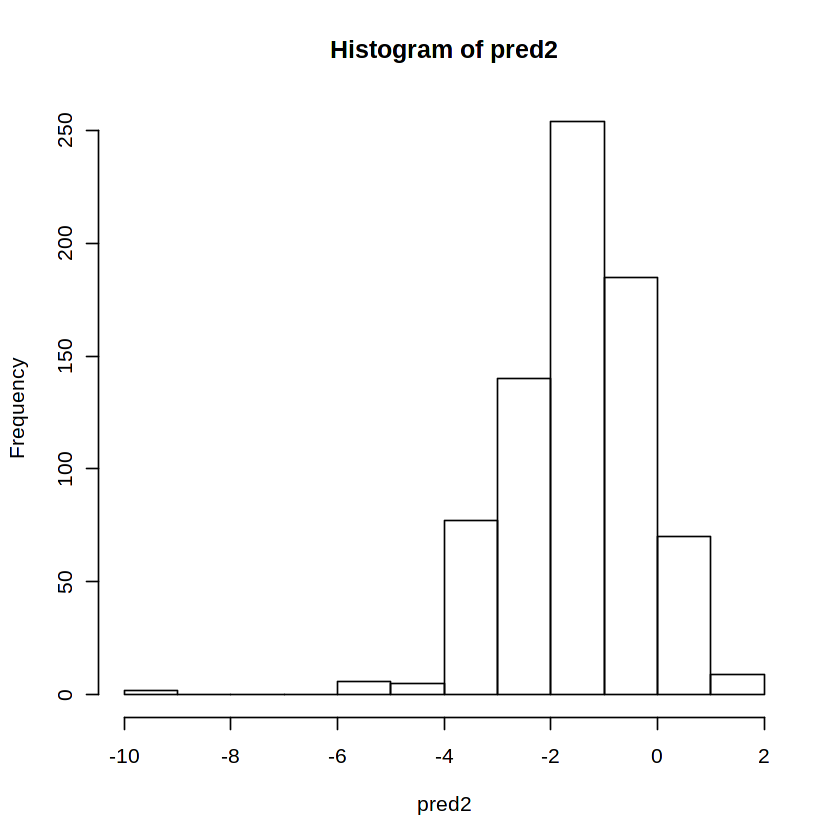

In [106]:
pred2 <- predict(mod2, newdata = bd)
hist(pred2)

In [28]:
pred_cat2 <- ifelse(pred2 >= 0.5,1,0)
table(pred_cat2)

pred_cat2
  0   1 
711  37 

#### Why we get those results? Is something wrong?
#### What do you recommend to do to get better results?

In [29]:
table()

    obs
pred   0   1
   0 555 156
   1  15  22

In [33]:
paste("Accuracy: ", (()/nrow(bd)))

[1] "Accuracy:  0.771390374331551"

## Naive Bayes Regression

In [26]:
mod3 <- naiveBayes()
mod3


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.7620321 0.2379679 

Conditional probabilities:
   time_since_last
Y        [,1]     [,2]
  0 10.771930 8.425039
  1  5.455056 5.170615

   donate_times
Y       [,1]     [,2]
  0 4.801754 4.746768
  1 7.797753 8.036892

   blood_total_cc
Y       [,1]     [,2]
  0 1200.439 1186.692
  1 1949.438 2009.223

   time_since_first
Y       [,1]     [,2]
  0 34.77018 24.60539
  1 32.71910 23.62943


0,1
2.614048e-27,1.0000000
2.396895e-01,0.7603105
4.178844e-02,0.9582116
1.459464e-03,0.9985405
2.433045e-05,0.9999757
8.258225e-01,0.1741775


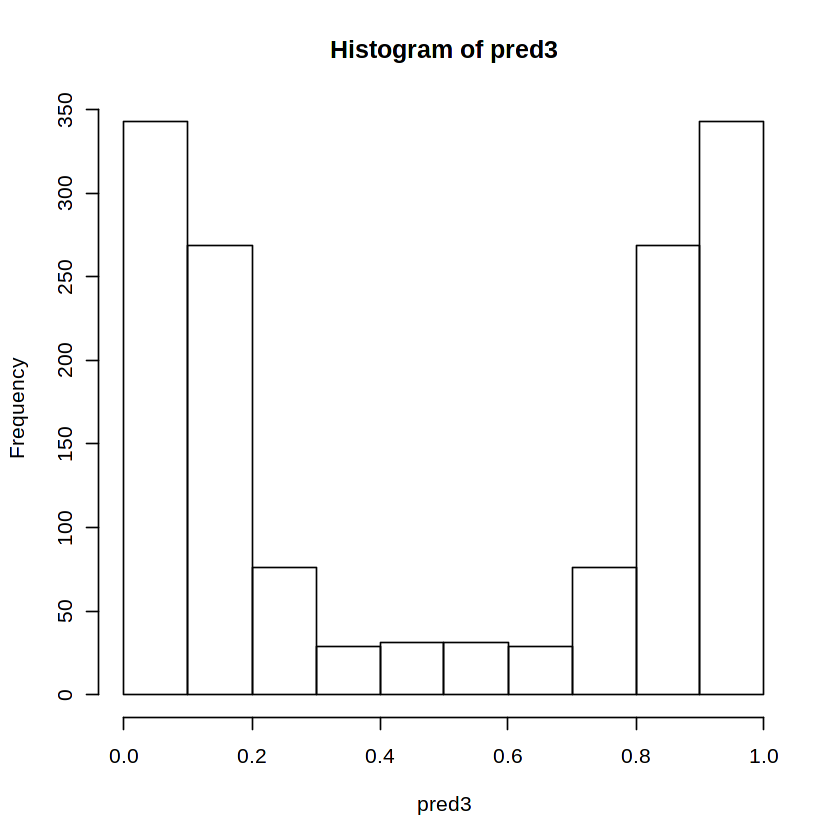

In [31]:
pred3 <- predict()
head(pred3)
hist(pred3)

In [32]:
pred_cat3 <- ifelse()
table(pred_cat3)

pred_cat3
  0   1 
672  76 

In [34]:
table()

    obs
pred   0   1
   0 528 144
   1  42  34

In [35]:
paste("Accuracy: ", (()/nrow(bd)))

[1] "Accuracy:  0.751336898395722"